**Overview:** This dataset is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers.

**Data Description:** This dataset contains 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



# **Import Dataset**

In [2]:
Bank = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
Bank2 = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
Bank3 = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv') 


# **Attributes Information:**


1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month
8. Education: Education Level. 1: Undergrad  2: Graduate  3:Advanced/Professional
9. Mortgage: Value of house mortgage if any.
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Does the customer use internet banking facilities?
14. Credit card: Does the customer use a credit card issued by the bank?

# **Explorate Dataset**

In [3]:
Bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
Bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# The Target of dataset is **"Personal Loan"**

In [5]:
Target= ["Personal Loan"]
t= Bank[Target]
t.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [6]:
Bank['Personal Loan'].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

# **Show Unique Values on dataset**

In [7]:
Bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# **Dataset Shape**

In [8]:
rows_count, columns_count = Bank.shape
print("Number of rows :", rows_count)
print("Number of columns :", columns_count)

Number of rows : 5000
Number of columns : 14


# **Check Null Values**

In [9]:
Bank.isnull()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Check Duplicates**

In [10]:
Bank.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

# **Heat map Correlation of Attributes**

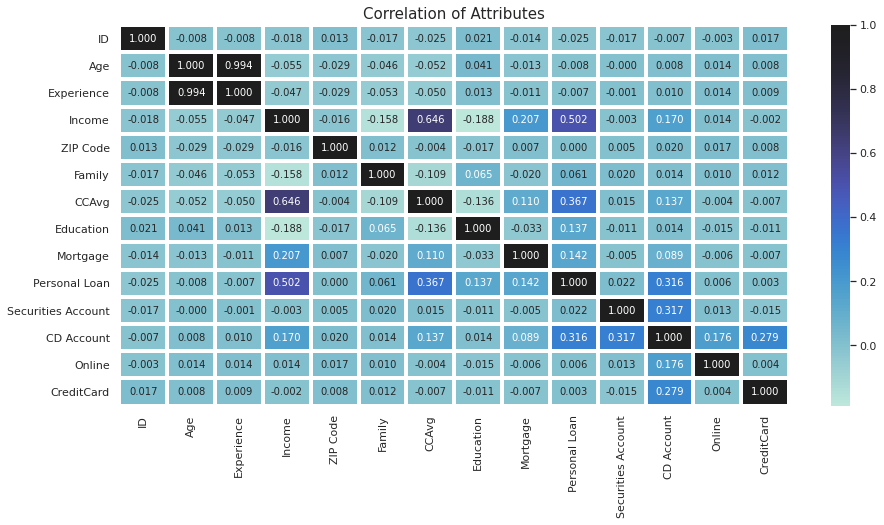

In [11]:
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(Bank.corr(), annot=True, linewidths=3, fmt='.3f', center=1);

**Observation:** found that the most correlated features on Personal Loan is: 

1.   Income
2.   CCAvg
3.   CD Account

# **Data Visualization**

**Description:** Showing distribution of bunch of features:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



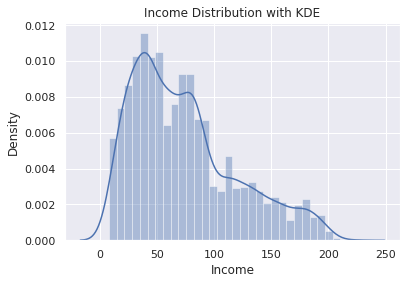

In [12]:
sns.distplot(Bank['Income'])
plt.title('Income Distribution with KDE');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



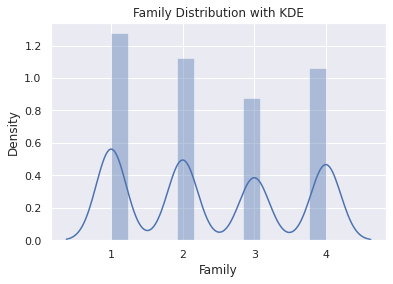

In [13]:
sns.distplot(Bank['Family'])
plt.title('Family Distribution with KDE');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



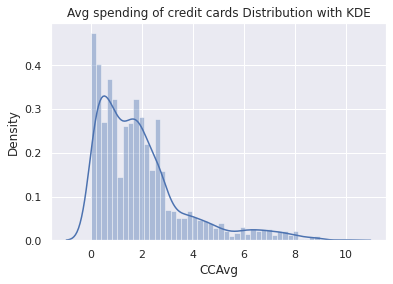

In [14]:
sns.distplot(Bank['CCAvg'])
plt.title('Avg spending of credit cards Distribution with KDE');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



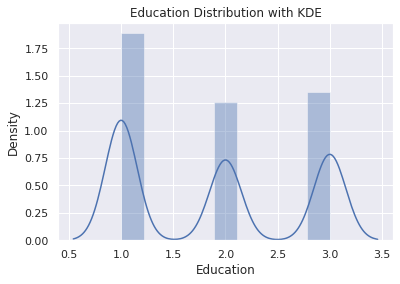

In [15]:
sns.distplot(Bank['Education'])
plt.title('Education Distribution with KDE');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



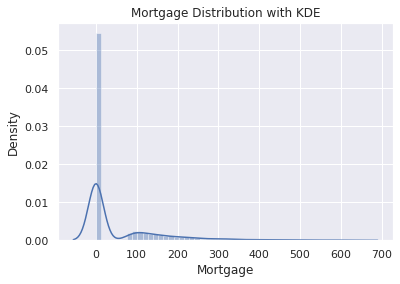

In [16]:
sns.distplot(Bank['Mortgage'])
plt.title('Mortgage Distribution with KDE');

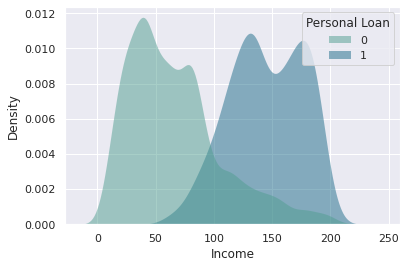

In [17]:
sns.kdeplot(
   data=Bank, x='Income', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

**Observation:** found that Personal Loan is  more likely to happend when the Income increases.

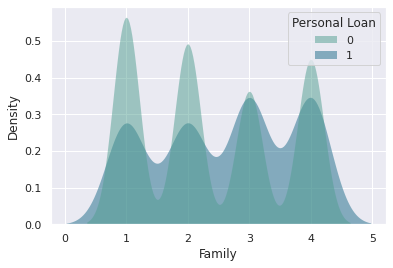

In [18]:
sns.kdeplot(
   data=Bank, x='Family', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

**Observation:** found that Personal Loan is more likely to be achieved when the Family members are bigger.

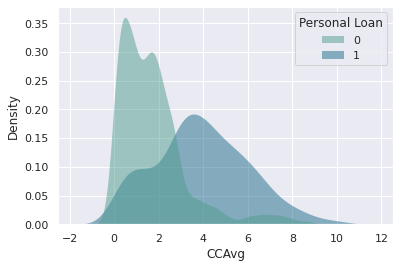

In [19]:
sns.kdeplot(
   data=Bank, x='CCAvg', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

**Observation:** found that Personal Loan is more likely to happend when the Credit Card Average of spending is higher. 

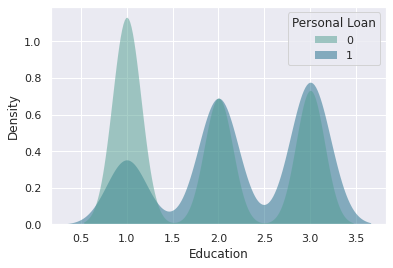

In [20]:
sns.kdeplot(
   data=Bank, x='Education', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

**Observation:** found that Personal Loan is  more likely to happend when the Eduacation level is higher. 

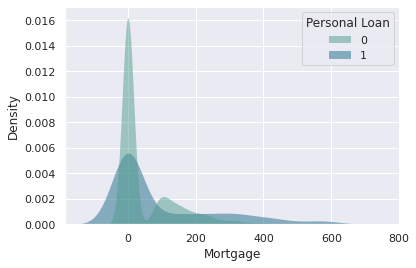

In [21]:
sns.kdeplot(
   data=Bank, x='Mortgage', hue="Personal Loan",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
) 

**Observation:** found that Personal Loan is more likely to happend when the Mortagage equal 0 

In [22]:
loan_acceptance_count = pd.DataFrame(Bank['Personal Loan'].value_counts()).reset_index()
loan_acceptance_count.columns = ['Labels', 'Personal Loan']
loan_acceptance_count

,Labels,Personal Loan
0,0,4520
1,1,480


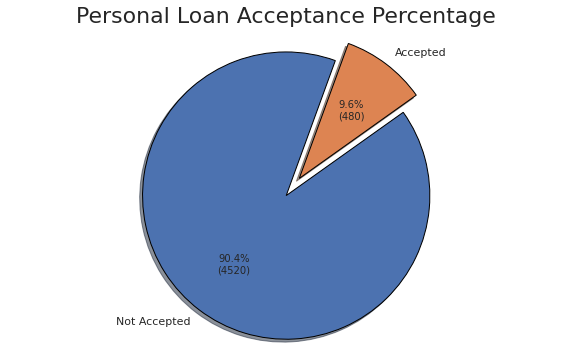

In [23]:
pie_labels = loan_acceptance_count['Labels']
pie_labels = ['Not Accepted' if x == 0 else 'Accepted' for x in pie_labels]
pie_data = loan_acceptance_count['Personal Loan'] 
explode = (0, 0.15) 
wp = { 'linewidth' : 1, 'edgecolor' : '#000000' }

def func(pct, allvalues): 
    absolute = int(np.round(pct / 100.*np.sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 6))

ax.pie(pie_data,  
       autopct = lambda pct: func(pct, pie_data), 
       explode = explode,  
       labels = pie_labels, 
       shadow = True, 
       startangle = 70, 
       wedgeprops = wp)

ax.axis('equal') 
plt.title('Personal Loan Acceptance Percentage', size=22)
plt.show();

**Observation:** Percentage of Personal Loan Acceptance catogories:

1.   Accepted
2.   Not Accepted



In [24]:
fig = px.bar(Bank, x='Experience', y='Income', title='...', color='Experience')
fig.show()

**Observation:** found that the probabilty of Income to be at its highest point when the experience years are 20.

In [25]:
categorical_variables= [col for col in Bank.columns if Bank[col].nunique()<=5]
print(categorical_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [26]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


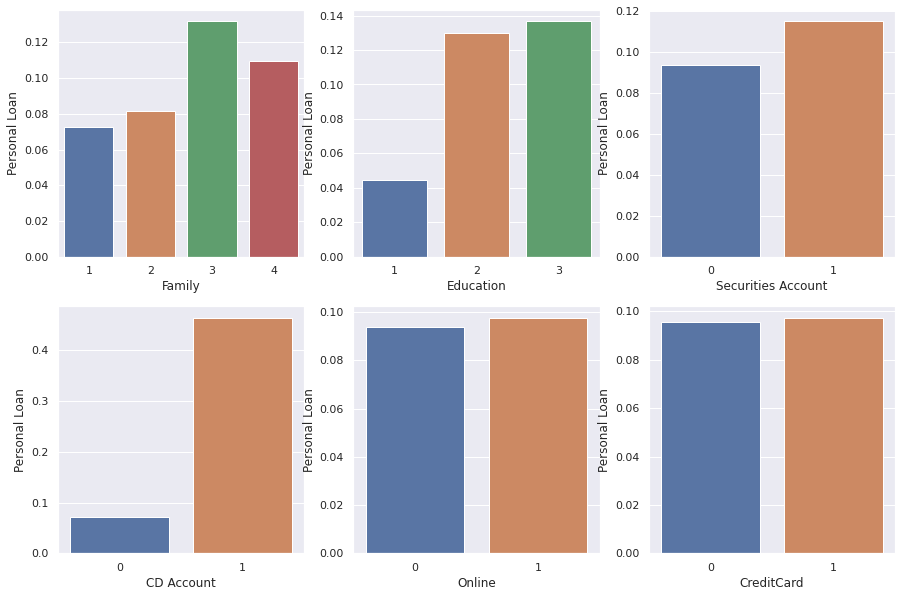

In [27]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=Bank,ci=None)

**Observation:**
1. Customers with family size equal to 3 have more chances of having Personal Loan.
2. Customers with Undergraduate degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree.
3. Customers with CD Account and Securities Account have more chances of having Personal Loan.
4. Customers with Online & Credit Card is more likely to have Personal Loan than others don't have a one. 

# **Feature Selection**

In [28]:
X = Bank.drop('Personal Loan', axis = 1)    #set X with all feature except Personal Loan
Y = Bank[['Personal Loan']]                 #set y with our target feature Personal Loan

# **Train Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



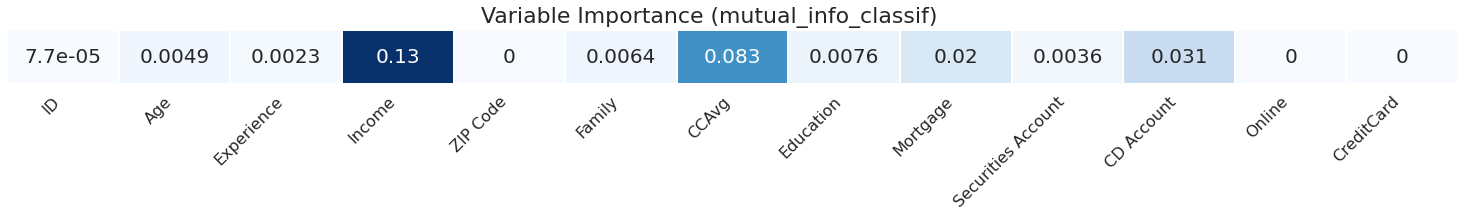

In [30]:
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

**Observation:** most Imortant features on dataset (Income, CCAvg, CD Account)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 0, 'Feature Importance')

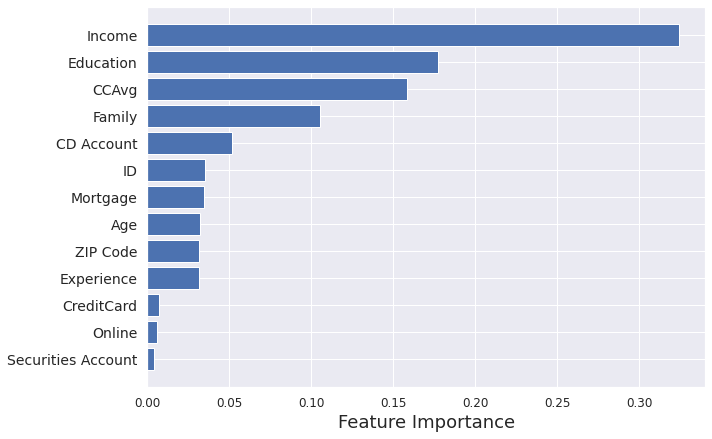

In [31]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=14)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize = 18)

**Observation:** Ranking most Imortant features on dataset by using Random Forest **feature_importances_** and the most effective feature are:


1. Income
2. Education
3. CCAvg



# **Model Building**

In [32]:
Bank = Bank.drop(['ID','ZIP Code'], axis=1) #dropped not important feaures

In [33]:
Bank.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


# **Scaling Dataset**

**Observation:** Using standard scaling to scale unbalanced ranges in values

In [34]:
scaler=StandardScaler()

In [35]:
scaled_df=scaler.fit_transform(Bank.drop('Personal Loan',axis=1))

In [36]:
scaled_df=pd.DataFrame(scaled_df)

In [37]:
scaled_df.columns=Bank.drop('Personal Loan',axis=1).columns
scaled_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632




* We had to do scaling to enhance results & reduce miss classifications. 
* After doing scaling saw that accuracy & recall got higher with much accurate results.





# Decision Tree (DT)

In [38]:
DT = DecisionTreeClassifier(max_depth=2)
# max_depth is maximum number of levels in the tree 
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
y_pred_DT= DT.predict(X_test)

In [40]:
print(accuracy_score(y_test,y_pred_DT))

0.949


In [41]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)

[[883  21]
 [ 30  66]]


In [42]:
y_pred_DT= DT.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       904
           1       0.76      0.69      0.72        96

    accuracy                           0.95      1000
   macro avg       0.86      0.83      0.85      1000
weighted avg       0.95      0.95      0.95      1000



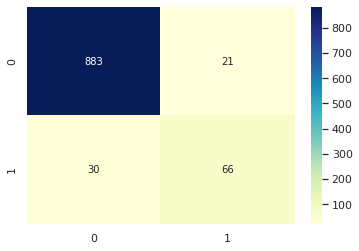

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred_DT),annot=True,fmt='',cmap='YlGnBu')

# Support Vector Machine (SVM)

In [44]:
SVM = SVC(kernel='linear',C=1.0, gamma='scale')
SVM.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred_SVM = SVM.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred_SVM))

0.908


In [47]:
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print(cm_SVM)

[[880  24]
 [ 68  28]]


In [48]:
y_pred_SVM= SVM.predict(X_test)
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       904
           1       0.54      0.29      0.38        96

    accuracy                           0.91      1000
   macro avg       0.73      0.63      0.66      1000
weighted avg       0.89      0.91      0.90      1000



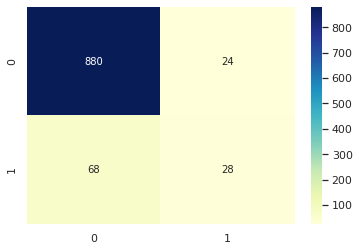

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred_SVM),annot=True,fmt='',cmap='YlGnBu')

#K-Nearest Neighbors (KNN)

In [50]:
kclf = KNeighborsClassifier(n_neighbors=5)

In [51]:
kclf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred_KNN= kclf.predict(X_test)

In [53]:
print(metrics.accuracy_score(y_test, y_pred_KNN))

0.903


In [54]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)

[[899   5]
 [ 92   4]]


In [55]:
y_pred_KNN= kclf.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       904
           1       0.44      0.04      0.08        96

    accuracy                           0.90      1000
   macro avg       0.68      0.52      0.51      1000
weighted avg       0.86      0.90      0.87      1000



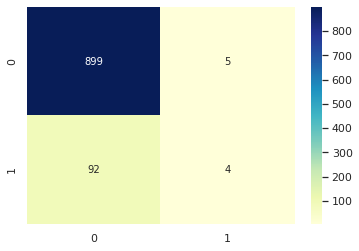

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred_KNN),annot=True,fmt='',cmap='YlGnBu')

# Logistic Regression (LR)

In [57]:
LR= LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_LR= LR.predict(X_test)

In [59]:
print(metrics.accuracy_score(y_test, y_pred_LR))

0.903


In [60]:
cm_LR = confusion_matrix(y_test, y_pred_LR)
print(cm_LR)

[[872  32]
 [ 65  31]]


In [61]:
y_pred_LR= LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       904
           1       0.49      0.32      0.39        96

    accuracy                           0.90      1000
   macro avg       0.71      0.64      0.67      1000
weighted avg       0.89      0.90      0.89      1000



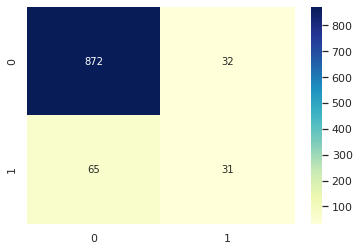

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True,fmt='',cmap='YlGnBu')

# Gaussian Naive Bayes (GNB)

In [63]:
GNB = GaussianNB()

In [64]:
GNB.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
y_pred_GNB= GNB.predict(X_test)

In [66]:
print(metrics.accuracy_score(y_test, y_pred_GNB))

0.894


In [67]:
cm_GNB = confusion_matrix(y_test, y_pred_GNB)
print(cm_GNB)

[[839  65]
 [ 41  55]]


In [68]:
y_pred_GNB= GNB.predict(X_test)
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       904
           1       0.46      0.57      0.51        96

    accuracy                           0.89      1000
   macro avg       0.71      0.75      0.72      1000
weighted avg       0.91      0.89      0.90      1000



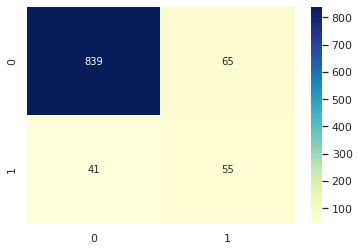

In [69]:
sns.heatmap(confusion_matrix(y_test,y_pred_GNB),annot=True,fmt='',cmap='YlGnBu')

# Random Forest (RF)

In [70]:
RF= RandomForestClassifier(n_estimators=500, random_state=0)

In [71]:
RF.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred_RF= RF.predict(X_test)

In [73]:
print(metrics.accuracy_score(y_test, y_pred_RF))

0.983


In [74]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)

[[902   2]
 [ 15  81]]


In [75]:
y_pred_RF= RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.98      0.84      0.91        96

    accuracy                           0.98      1000
   macro avg       0.98      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



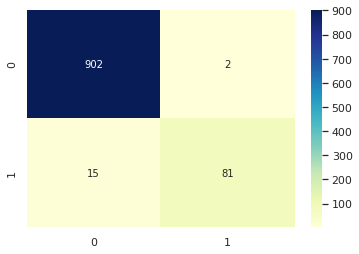

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True,fmt='',cmap='YlGnBu')


End of work before trying to enhance the results of models.

# **Understanding Relations Between Features**

In [77]:
Selected= Bank2[['Income','Family','CCAvg']].corr()
Selected 

,Income,Family,CCAvg
Income,1.000000,-0.157501,0.645984
Family,-0.157501,1.000000,-0.109275
CCAvg,0.645984,-0.109275,1.000000


**Observation:** Choosed most important features and highly ones  (Income, Family, CCAvg) 

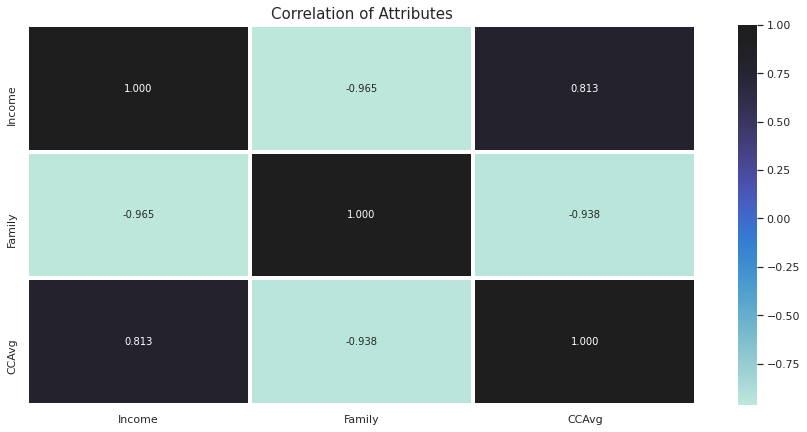

In [78]:
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(Selected.corr(), annot=True, linewidths=3, fmt='.3f', center=1);

In [79]:
corr_PL= Bank2[['Age','Experience','Personal Loan']].corr()
corr_PL

,Age,Experience,Personal Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal Loan,-0.007726,-0.007413,1.000000


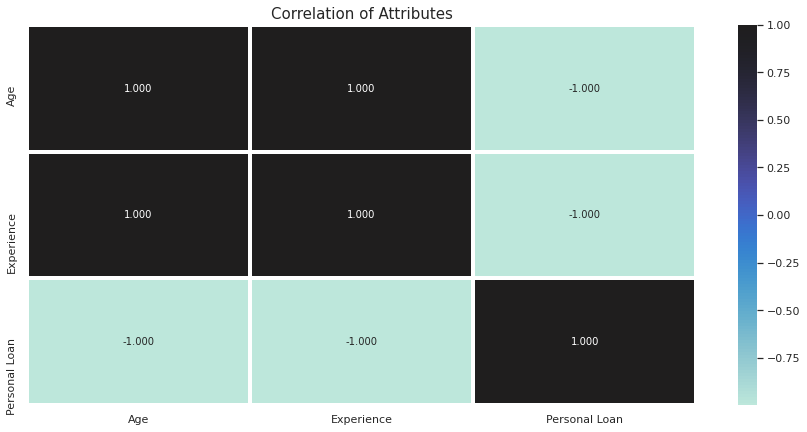

In [80]:
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(corr_PL.corr(), annot=True, linewidths=3, fmt='.3f', center=1);

In [81]:
Bank2.drop('Experience',axis=1)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,49,90034,3,0.5,2,0,0,0,0,1,0


**Observation:** since Age shows a little better correlation with Personal loan we will drop the Experience attribute



# **Model Building After Try to Enhance**

In [82]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm) 

In [84]:
Bank2 = Bank2.drop(['ID','ZIP Code','Securities Account','CreditCard','Online','Experience'], axis=1)

**Observation:** dropped Experience over Age because we found it slightly better on correlation with Personal Loan, and dropped Securities Account, CreditCard, Online becuse they didn't show any influence change.

In [85]:
Bank2.head() #dataset after dropping unwanted attributes

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,49,4,1.6,1,0,0,0
1,45,34,3,1.5,1,0,0,0
2,39,11,1,1.0,1,0,0,0
3,35,100,1,2.7,2,0,0,0
4,35,45,4,1.0,2,0,0,0


# Decision Tree (DT) After Enhance

In [86]:
dt2 = DecisionTreeClassifier(max_depth=2)
# max_depth is maximum number of levels in the tree 
dt2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
y_pred_DT2= dt2.predict(X_test)

In [88]:
print(accuracy_score(y_test,y_pred_DT2))

0.9535398230088495


In [89]:
cm_DT2 = confusion_matrix(y_test, y_pred_DT2)
print(cm_DT2)

[[870  34]
 [ 50 854]]


In [90]:
y_pred_DT2= dt2.predict(X_test)
print(classification_report(y_test, y_pred_DT2))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       904
           1       0.96      0.94      0.95       904

    accuracy                           0.95      1808
   macro avg       0.95      0.95      0.95      1808
weighted avg       0.95      0.95      0.95      1808



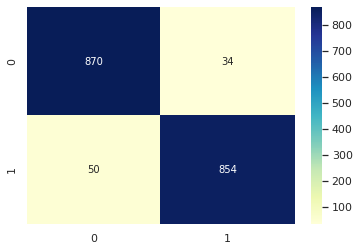

In [91]:
sns.heatmap(confusion_matrix(y_test,y_pred_DT2),annot=True,fmt='',cmap='YlGnBu')

# Support Vector Machine (SVM) After Enhance

In [92]:
SVM2 = SVC(kernel='linear',C=1.0, gamma='scale')
SVM2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
y_pred_SVM2 = SVM2.predict(X_test)

In [94]:
print(accuracy_score(y_test,y_pred_SVM2))

0.894358407079646


In [95]:
cm_SVM2 = confusion_matrix(y_test, y_pred_SVM2)
print(cm_SVM2)

[[771 133]
 [ 58 846]]


In [96]:
y_pred_SVM2= SVM2.predict(X_test)
print(classification_report(y_test, y_pred_SVM2))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       904
           1       0.86      0.94      0.90       904

    accuracy                           0.89      1808
   macro avg       0.90      0.89      0.89      1808
weighted avg       0.90      0.89      0.89      1808



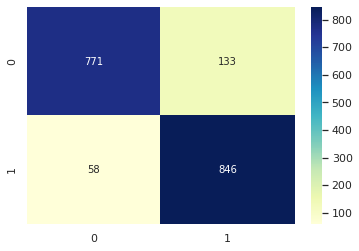

In [97]:
sns.heatmap(confusion_matrix(y_test,y_pred_SVM2),annot=True,fmt='',cmap='YlGnBu')

# K-Nearest Neighbors After Enhance

In [98]:
kclf2 = KNeighborsClassifier(n_neighbors=5)

In [99]:
kclf2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
y_pred_KNN2= kclf2.predict(X_test)

In [101]:
print(metrics.accuracy_score(y_test, y_pred_KNN2))

0.8573008849557522


In [102]:
cm_KNN2 = confusion_matrix(y_test, y_pred_KNN2)
print(cm_KNN2)

[[701 203]
 [ 55 849]]


In [103]:
y_pred_KNN2= kclf2.predict(X_test)
print(classification_report(y_test, y_pred_KNN2))

              precision    recall  f1-score   support

           0       0.93      0.78      0.84       904
           1       0.81      0.94      0.87       904

    accuracy                           0.86      1808
   macro avg       0.87      0.86      0.86      1808
weighted avg       0.87      0.86      0.86      1808



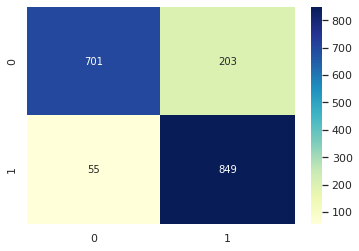

In [104]:
sns.heatmap(confusion_matrix(y_test,y_pred_KNN2),annot=True,fmt='',cmap='YlGnBu')

# Logistic Regression After Enhance

In [105]:
LR2= LogisticRegression()
LR2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
y_pred_LR2= LR2.predict(X_test)

In [107]:
print(metrics.accuracy_score(y_test, y_pred_LR2))

0.9065265486725663


In [108]:
cm_LR2 = confusion_matrix(y_test, y_pred_LR2)
print(cm_LR2)

[[800 104]
 [ 65 839]]


In [109]:
y_pred_LR2= LR2.predict(X_test)
print(classification_report(y_test, y_pred_LR2))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       904
           1       0.89      0.93      0.91       904

    accuracy                           0.91      1808
   macro avg       0.91      0.91      0.91      1808
weighted avg       0.91      0.91      0.91      1808



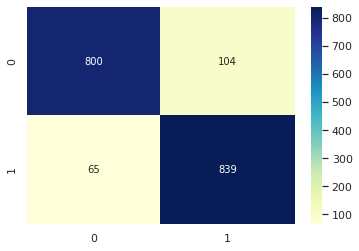

In [110]:
sns.heatmap(confusion_matrix(y_test,y_pred_LR2),annot=True,fmt='',cmap='YlGnBu')

## Gaussian Naive Bayes After Enhancing

In [111]:
GNB2 = GaussianNB()

In [112]:
GNB2.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [113]:
y_pred_GNB2= GNB2.predict(X_test)

In [114]:
print(metrics.accuracy_score(y_test, y_pred_GNB2))

0.8882743362831859


In [115]:
cm_GNB2 = confusion_matrix(y_test, y_pred_GNB2)
print(cm_GNB2)

[[803 101]
 [101 803]]


In [116]:
y_pred_GNB2= GNB2.predict(X_test)
print(classification_report(y_test, y_pred_GNB2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       904
           1       0.89      0.89      0.89       904

    accuracy                           0.89      1808
   macro avg       0.89      0.89      0.89      1808
weighted avg       0.89      0.89      0.89      1808



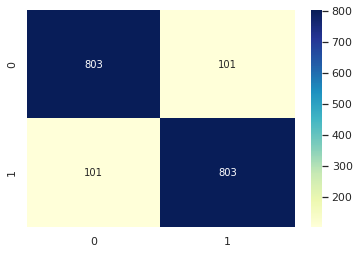

In [117]:
sns.heatmap(confusion_matrix(y_test,y_pred_GNB2),annot=True,fmt='',cmap='YlGnBu')

# Random Forest After Enhance

In [118]:
RF2= RandomForestClassifier(n_estimators=500, random_state=0)

In [119]:
RF2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [120]:
y_pred_RF2= RF2.predict(X_test)

In [121]:
print(metrics.accuracy_score(y_test, y_pred_RF2))

0.9933628318584071


In [122]:
cm_RF2 = confusion_matrix(y_test, y_pred_RF2)
print(cm_RF2)

[[897   7]
 [  5 899]]


In [123]:
y_pred_RF2= RF2.predict(X_test)
print(classification_report(y_test, y_pred_RF2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.99      0.99      0.99       904

    accuracy                           0.99      1808
   macro avg       0.99      0.99      0.99      1808
weighted avg       0.99      0.99      0.99      1808



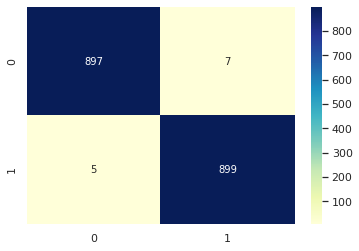

In [124]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF2),annot=True,fmt='',cmap='YlGnBu')


# **Data Visualization After Enhancing**

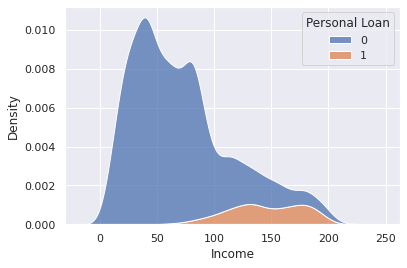

In [125]:
sns.kdeplot(data=Bank, x="Income", hue="Personal Loan", multiple="stack")

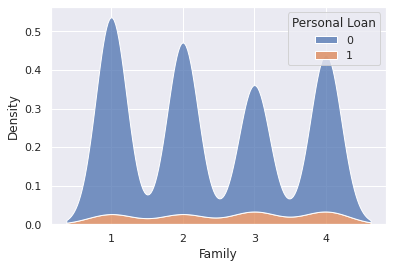

In [126]:
sns.kdeplot(data=Bank, x="Family", hue="Personal Loan", multiple="stack")

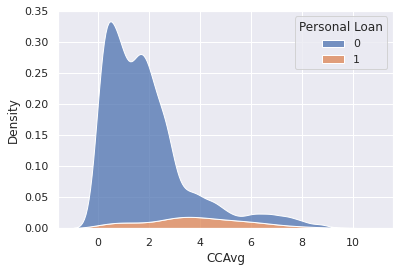

In [127]:
sns.kdeplot(data=Bank, x="CCAvg", hue="Personal Loan", multiple="stack") 

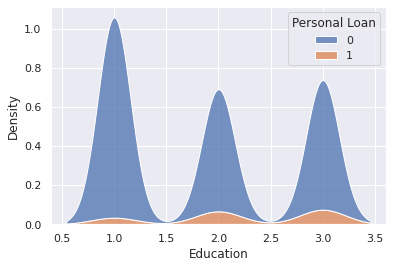

In [128]:
sns.kdeplot(data=Bank, x="Education", hue="Personal Loan", multiple="stack")

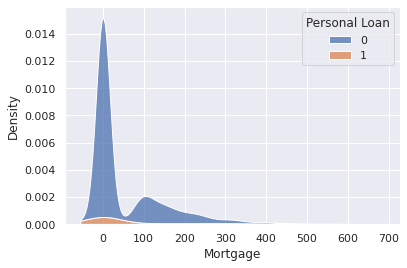

In [129]:
sns.kdeplot(data=Bank, x="Mortgage", hue="Personal Loan", multiple="stack") 

In [130]:
X = Bank3[['CCAvg','Family','Income']]
Y = Bank3[['Personal Loan']] 

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y) 

**Description:** We did another try to enhance the model by giving it the most important features & selected three of them:
1.   Income
2.   Family 
3. CCAvg



# Decision Tree 3 (Try)

In [132]:
dt3 = DecisionTreeClassifier(max_depth=2)
# max_depth is maximum number of levels in the tree 
dt3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [133]:
y_pred_DT3= dt3.predict(X_test)

In [134]:
print(accuracy_score(y_test,y_pred_DT3))

0.935


In [135]:
cm_DT3 = confusion_matrix(y_test, y_pred_DT3)
print(cm_DT3)

[[894  10]
 [ 55  41]]


In [136]:
y_pred_DT3= dt3.predict(X_test)
print(classification_report(y_test, y_pred_DT3))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       904
           1       0.80      0.43      0.56        96

    accuracy                           0.94      1000
   macro avg       0.87      0.71      0.76      1000
weighted avg       0.93      0.94      0.93      1000



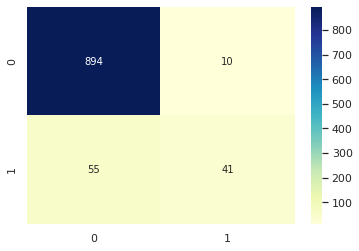

In [137]:
sns.heatmap(confusion_matrix(y_test,y_pred_DT3),annot=True,fmt='',cmap='YlGnBu')

# Random Forest 3 (Try)

In [138]:
RF3= RandomForestClassifier(n_estimators=500, random_state=0)

In [139]:
RF3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [140]:
y_pred_RF3= RF3.predict(X_test)

In [141]:
print(metrics.accuracy_score(y_test, y_pred_RF3))

0.955


In [142]:
cm_RF3 = confusion_matrix(y_test, y_pred_RF3)
print(cm_RF3)

[[898   6]
 [ 39  57]]


In [143]:
y_pred_RF3= RF3.predict(X_test)
print(classification_report(y_test, y_pred_RF3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       904
           1       0.90      0.59      0.72        96

    accuracy                           0.95      1000
   macro avg       0.93      0.79      0.85      1000
weighted avg       0.95      0.95      0.95      1000



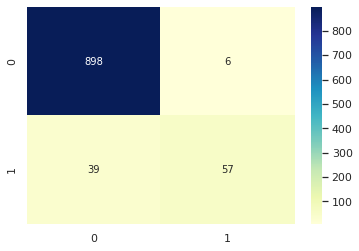

In [144]:
sns.heatmap(confusion_matrix(y_test,y_pred_RF3),annot=True,fmt='',cmap='YlGnBu')

# **Finally Thank You!**